![bees](bees.jpg)

# Which plants are better for bees: native or non-native?

## 📖 Background
You work for the local government environment agency and have taken on a project about creating pollinator bee-friendly spaces. You can use both native and non-native plants to create these spaces and therefore need to ensure that you use the correct plants to optimize the environment for these bees.

The team has collected data on native and non-native plants and their effects on pollinator bees. Your task will be to analyze this data and provide recommendations on which plants create an optimized environment for pollinator bees.

## 💾 The Data
You have assembled information on the plants and bees research in a file called `plants_and_bees.csv`. Each row represents a sample that was taken from a patch of land where the plant species were being studied.

| Column     | Description              |
|------------|--------------------------|
| `sample_id` | The ID number of the sample taken. |
| `species_num` | The number of different bee species in the sample. |
| `date` | Date the sample was taken. |
| `season` | Season during sample collection ("early.season" or "late.season"). |
| `site` | Name of collection site. |
| `native_or_non` | Whether the sample was from a native or non-native plant. |
| `sampling` | The sampling method. |
| `plant_species` | The name of the plant species the sample was taken from. None indicates the sample was taken from the air. |
| `time` | The time the sample was taken. |
| `bee_species` | The bee species in the sample. |
| `sex` | The gender of the bee species. |
| `specialized_on` | The plant genus the bee species preferred. |
| `parasitic` | Whether or not the bee is parasitic (0:no, 1:yes). |
| `nesting` | The bees nesting method. |
| `status` | The status of the bee species. |
| `nonnative_bee` | Whether the bee species is native or not (0:no, 1:yes). |

[Source](https://datadryad.org/stash/dataset/doi%253A10.5061%252Fdryad.pzgmsbcj8) (data has been modified)

## 💪 Challenge
Provide your agency with a report that covers the following:
* Which plants are preferred by native vs non-native bee species?
* A visualization of the distribution of bee and plant species across one of the samples.
* Select the top three plant species you would recommend to the agency to support native bees.

## 🧑‍⚖️ Judging criteria

This is a community-based competition. The top 5 most upvoted entries will win.

The winners will receive DataCamp merchandise.

## ✅ Checklist before publishing
- Rename your workspace to make it descriptive of your work. N.B. you should leave the notebook name as notebook.ipynb.
- **Remove redundant cells** like the judging criteria, so the workbook is focused on your work.
- Check that all the cells run without error.

## ⌛️ Time is ticking. Good luck!

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
import pandas as pd
data = pd.read_csv("data/plants_and_bees.csv")
data['nonnative_bee'].value_counts()

0.0    1154
1.0      35
Name: nonnative_bee, dtype: int64

In [4]:
data

,sample_id,species_num,date,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee
0,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
1,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0
2,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0
3,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0
4,17400,23,04/18/2017,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1246,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1247,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0
1248,17481,11,08/02/2017,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,NaN,0.0,ground,NaN,0.0


In [5]:
import pandas as pd

data = pd.read_csv("data/plants_and_bees.csv")

# Convert date column to datetime format
data['date'] = pd.to_datetime(data['date'])

# Extract day, month, and year from date column
data['day'] = data['date'].dt.day
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year

# Drop original date column
data.drop('date', axis=1, inplace=True)

# Preview updated dataframe
data.head()

,sample_id,species_num,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,specialized_on,parasitic,nesting,status,nonnative_bee,day,month,year
0,17400,23,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0,18,4,2017
1,17400,23,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,NaN,0.0,ground,NaN,0.0,18,4,2017
2,17400,23,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,NaN,0.0,ground,NaN,0.0,18,4,2017
3,17400,23,early.season,A,native,pan traps,None,935,Andrena carlini,f,NaN,0.0,ground,NaN,0.0,18,4,2017
4,17400,23,early.season,A,native,pan traps,None,935,Andrena perplexa,m,NaN,0.0,ground,NaN,0.0,18,4,2017


In [6]:
# Count null values in the 'specialized_on' column
spl_null_count = data.isnull().sum()

# Calculate percentage of null values in the 'specialized_on' column
spl_null_pct = spl_null_count / len(data) * 100

# Display results
spl_null_pct

sample_id          0.00
species_num        0.00
season             0.00
site               0.00
native_or_non      0.00
sampling           0.00
plant_species      0.00
time               0.00
bee_species        0.00
sex                0.00
specialized_on    99.44
parasitic          5.04
nesting            4.32
status            98.80
nonnative_bee      4.88
day                0.00
month              0.00
year               0.00
dtype: float64

 I droped 'specialized_on' and 'status' columns because their the almost miss 98% of their data

In [7]:
# Drop 'specialized_on' and 'status' columns
data.drop(['specialized_on', 'status'], axis=1, inplace=True)

# Preview updated dataframe
data.head()

,sample_id,species_num,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee,day,month,year
0,17400,23,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,0.0,ground,0.0,18,4,2017
1,17400,23,early.season,A,native,pan traps,None,935,Agapostemon texanus,f,0.0,ground,0.0,18,4,2017
2,17400,23,early.season,A,native,pan traps,None,935,Augochlorella aurata,f,0.0,ground,0.0,18,4,2017
3,17400,23,early.season,A,native,pan traps,None,935,Andrena carlini,f,0.0,ground,0.0,18,4,2017
4,17400,23,early.season,A,native,pan traps,None,935,Andrena perplexa,m,0.0,ground,0.0,18,4,2017


In [8]:
for x in data["plant_species"]:
    if x == "None":
        data = data[data["plant_species"] != x]

I dropped all missing data in 'plant species' column

In [9]:
data.shape

(430, 16)

In [10]:
data.head()

,sample_id,species_num,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee,day,month,year
87,17406,1,early.season,C,non-native,hand netting,Trifolium incarnatum,1320,Apis mellifera,f,0.0,hive,1.0,18,4,2017
88,17406,2,early.season,C,non-native,hand netting,Viola cornuta,1320,Lasioglossum cressonii,f,0.0,wood,0.0,18,4,2017
89,17406,2,early.season,C,non-native,hand netting,Viola cornuta,1320,Ceratina calcarata,f,0.0,wood,0.0,18,4,2017
106,17409,1,early.season,A,non-native,hand netting,Trifolium repens,1340,Halictus parallelus,f,0.0,ground,0.0,2,5,2017
107,17409,10,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,0.0,ground,0.0,2,5,2017


### I splited Data dataframe into two dataframes depending on 'non native bee' column
#### - data_native   : contians all the data for the native bees
#### - data_nonative : contians all the data for non native bees

In [11]:
data_native = data[data['nonnative_bee']==1]
data_native
data_nonative = data[data['nonnative_bee']==0]
data_native

,sample_id,species_num,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee,day,month,year
87,17406,1,early.season,C,non-native,hand netting,Trifolium incarnatum,1320,Apis mellifera,f,0.0,hive,1.0,18,4,2017
1063,17469,13,late.season,B,non-native,hand netting,Daucus carota,1150,Apis mellifera,f,0.0,hive,1.0,18,7,2017


In [12]:
data_nonative

,sample_id,species_num,season,site,native_or_non,sampling,plant_species,time,bee_species,sex,parasitic,nesting,nonnative_bee,day,month,year
88,17406,2,early.season,C,non-native,hand netting,Viola cornuta,1320,Lasioglossum cressonii,f,0.0,wood,0.0,18,4,2017
89,17406,2,early.season,C,non-native,hand netting,Viola cornuta,1320,Ceratina calcarata,f,0.0,wood,0.0,18,4,2017
106,17409,1,early.season,A,non-native,hand netting,Trifolium repens,1340,Halictus parallelus,f,0.0,ground,0.0,2,5,2017
107,17409,10,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,0.0,ground,0.0,2,5,2017
108,17409,10,early.season,A,non-native,hand netting,Leucanthemum vulgare,1340,Halictus poeyi/ligatus,f,0.0,ground,0.0,2,5,2017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1245,17481,11,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,0.0,ground,0.0,2,8,2017
1246,17481,11,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,0.0,ground,0.0,2,8,2017
1247,17481,11,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,0.0,ground,0.0,2,8,2017
1248,17481,11,late.season,B,non-native,hand netting,Cichorium intybus,930,Halictus poeyi/ligatus,f,0.0,ground,0.0,2,8,2017


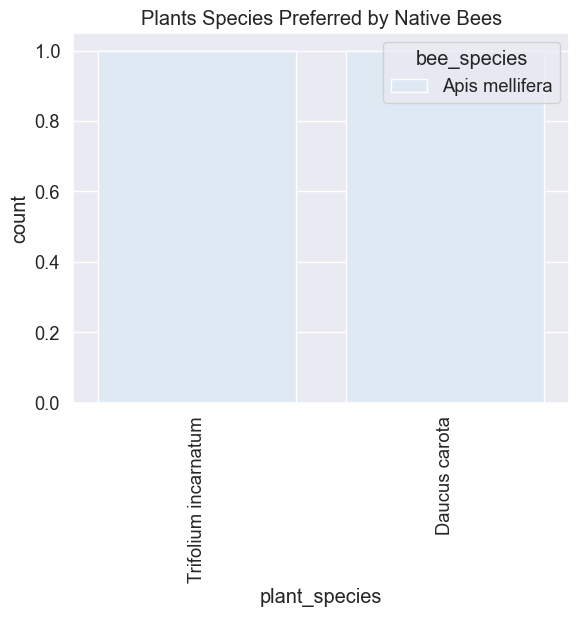

In [13]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set color palette
sns.set_palette(sns.color_palette("Blues"))

# Plot plant species counts for native plants
sns.countplot(data=data_native, x='plant_species',hue='bee_species')

# Rotate x-axis labels and set title
plt.xticks(rotation=90)
plt.title('Plants Species Preferred by Native Bees')

# Display the plot
plt.show()

### Native bees prefer these plants 
1. Trifolium incarnatum 
2. Daucus carota 

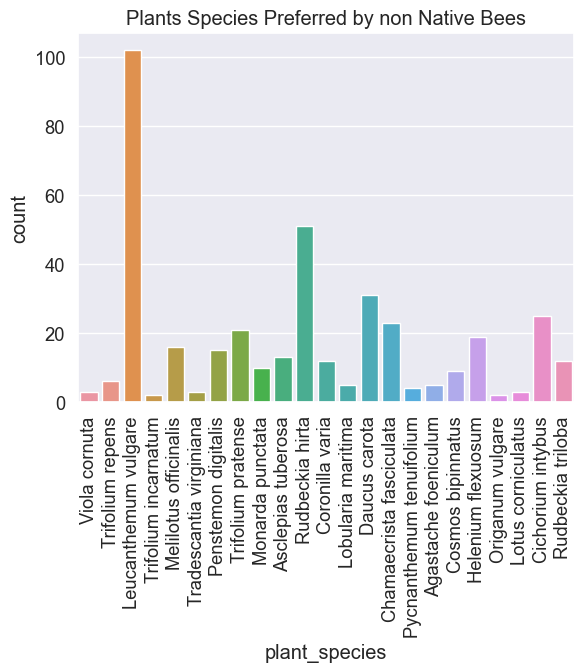

In [14]:
# Set color palette
sns.set_palette(sns.color_palette("Blues"))

# Plot plant species counts for native plants
sns.countplot(data=data_nonative, x='plant_species')

# Rotate x-axis labels
plt.xticks(rotation=90)
plt.title('Plants Species Preferred by non Native Bees')

# Display the plot
plt.show()


## It seems that [_**Leucanthemum vulgare**_](https://www.gardenia.net/plant/leucanthemum-vulgare-filigran-ox-eye-daisy) is the most prefered plant by the _**native**_ bees
### Non native bees prefer these plants 

1. Leucanthemum vulgare
2. Rudbeckia hirta
3. Daucus carota
4. Cichorium intybus
5. Chamaecrista fasciculata
6. Trifolium pratense
7. Helenium flexuosum
8. Melilotus officinalis
9. Penstemon digitalis
10. Asclepias tuberosa
11. Coronilla varia
12. Rudbeckia triloba
13. Monarda punctata
14. Cosmos bipinnatus
15. Trifolium repens
16. Lobularia maritima
17. Agastache foeniculum
18. Pycnanthemum tenuifolium
19. Tradescantia virginiana
20. Lotus corniculatus
21. Viola cornuta
22. Origanum vulgare
23. Trifolium incarnatum


In [15]:
interaction_nat_bee_plant_species = data_native.groupby(['bee_species', 'plant_species']).size().reset_index(name='counts')
interaction_nat_bee_plant_species = interaction_nat_bee_plant_species.sort_values(['bee_species', 'counts'], ascending=[True, False])
interaction_nat_bee_plant_species

,bee_species,plant_species,counts
0,Apis mellifera,Daucus carota,1
1,Apis mellifera,Trifolium incarnatum,1


In [16]:
interaction_nonat_bee_plant_species = data_nonative.groupby(['bee_species', 'plant_species']).size().reset_index(name='counts')
interaction_nonat_bee_plant_species = interaction_nonat_bee_plant_species.sort_values(by='counts', ascending=False)
interaction_nonat_bee_plant_species

,bee_species,plant_species,counts
67,Halictus poeyi/ligatus,Leucanthemum vulgare,78
72,Halictus poeyi/ligatus,Rudbeckia hirta,36
63,Halictus poeyi/ligatus,Cichorium intybus,20
30,Bombus bimaculatus,Trifolium pratense,14
40,Bombus impatiens,Chamaecrista fasciculata,11
...,...,...,...
52,Ceratina calcarata,Viola cornuta,1
51,Ceratina calcarata,Pycnanthemum tenuifolium,1
50,Ceratina calcarata,Helenium flexuosum,1
48,Calliopsis andreniformis,Trifolium pratense,1


-----------------------------------------------------------------------------------------------------------

<Figure size 1200x800 with 0 Axes>

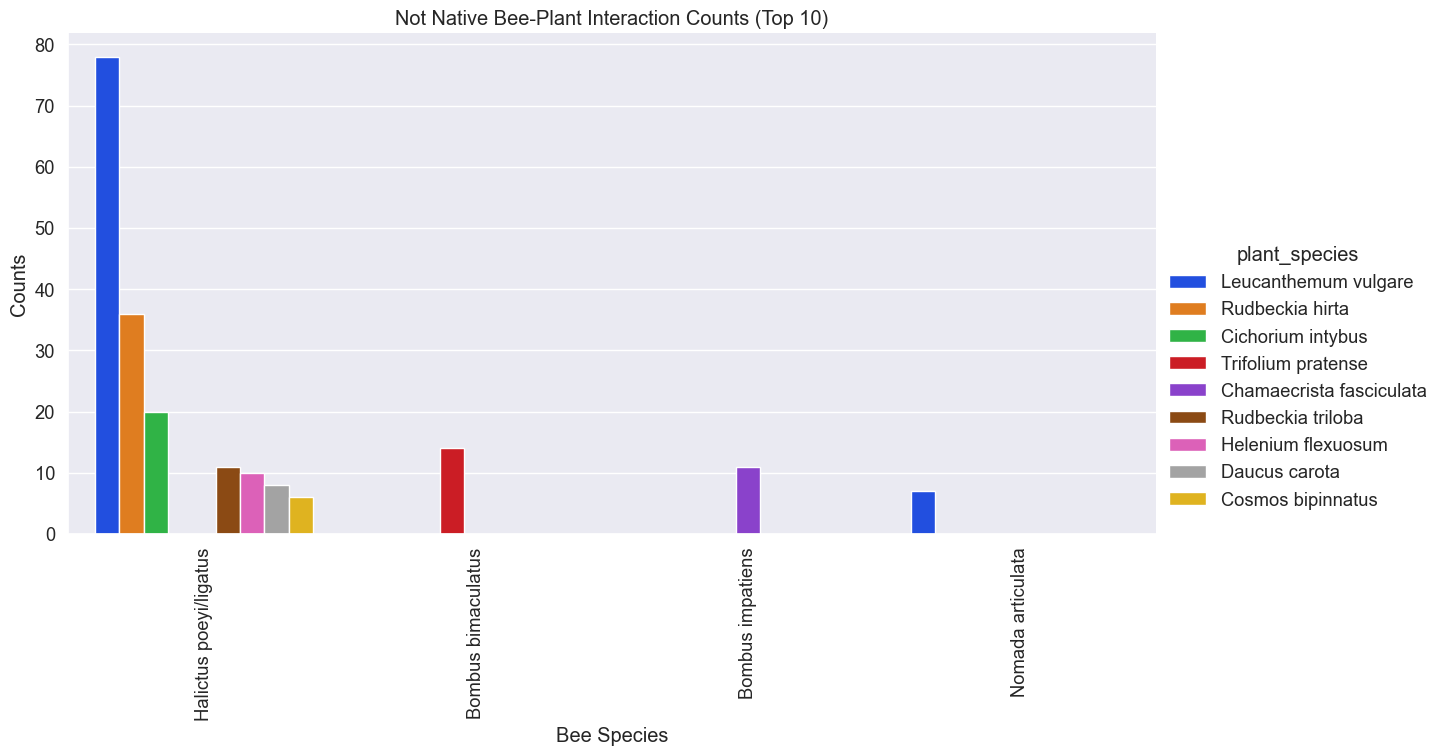

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.catplot(data=interaction_nonat_bee_plant_species[:10], x='bee_species', y='counts', hue='plant_species', kind='bar', height=6, aspect=2, palette='bright')
plt.xticks(rotation=90)
plt.title('Not Native Bee-Plant Interaction Counts (Top 10)')
plt.xlabel('Bee Species')
plt.ylabel('Counts')
plt.show()

<Figure size 1200x800 with 0 Axes>

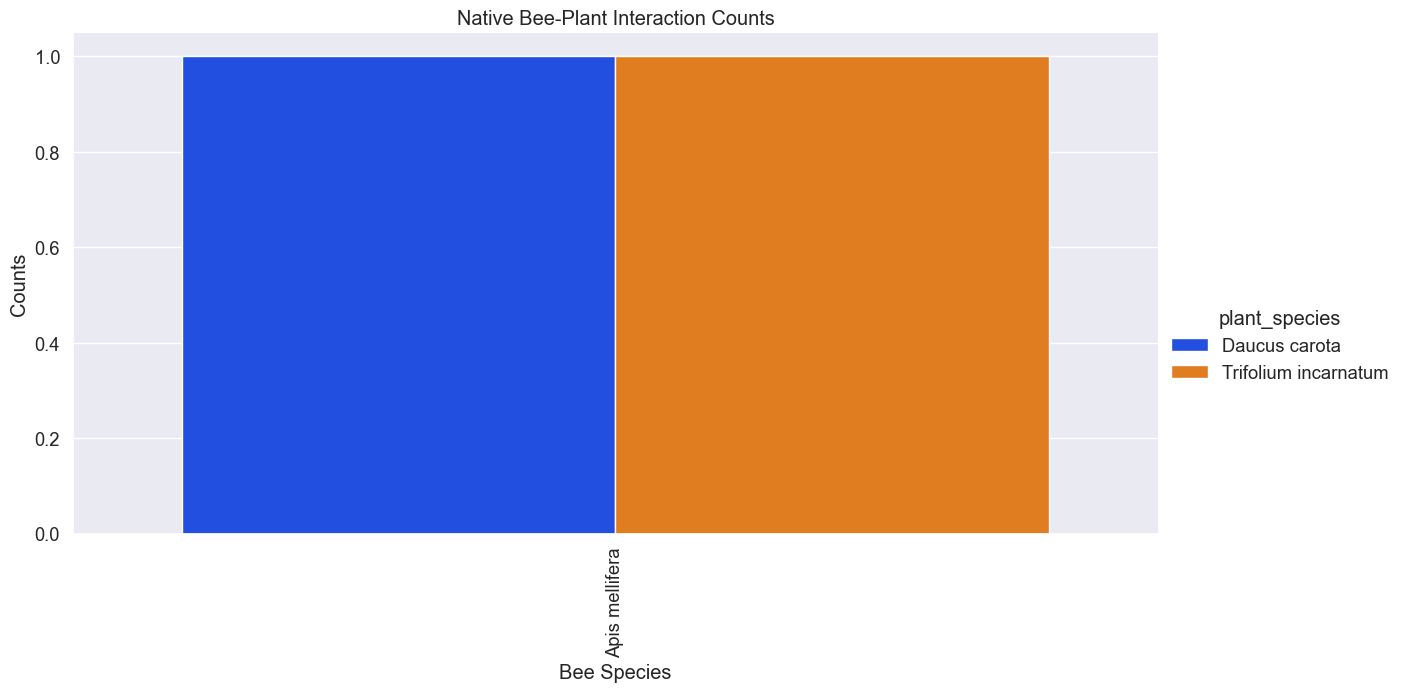

In [18]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.catplot(data=interaction_nat_bee_plant_species, x='bee_species', y='counts', hue='plant_species', kind='bar', height=6, aspect=2, palette='bright')
plt.xticks(rotation=90)
plt.title('Native Bee-Plant Interaction Counts')
plt.xlabel('Bee Species')
plt.ylabel('Counts')
plt.show()

In [19]:
sample_data= data[data['sample_id']==17473]
sample_data.shape


(34, 16)

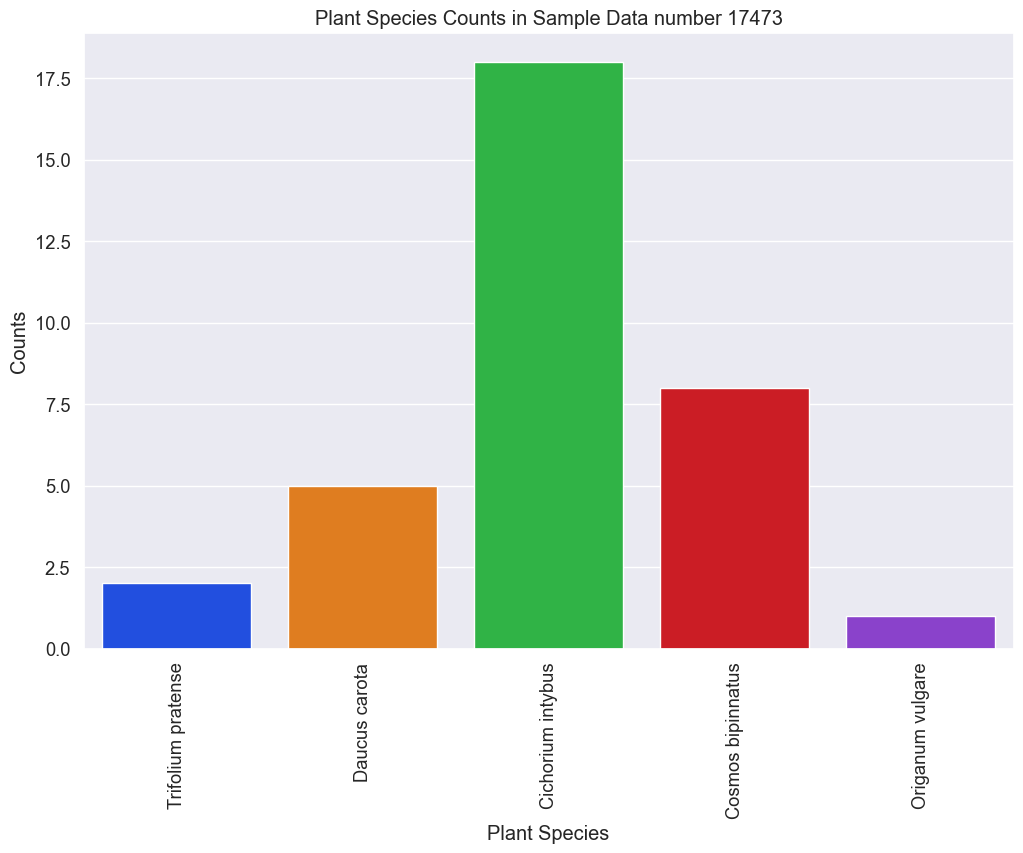

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.countplot(data=sample_data, x='plant_species', palette='bright')
plt.xticks(rotation=90)
plt.title('Plant Species Counts in Sample Data number 17473')
plt.xlabel('Plant Species')
plt.ylabel('Counts')
plt.show()

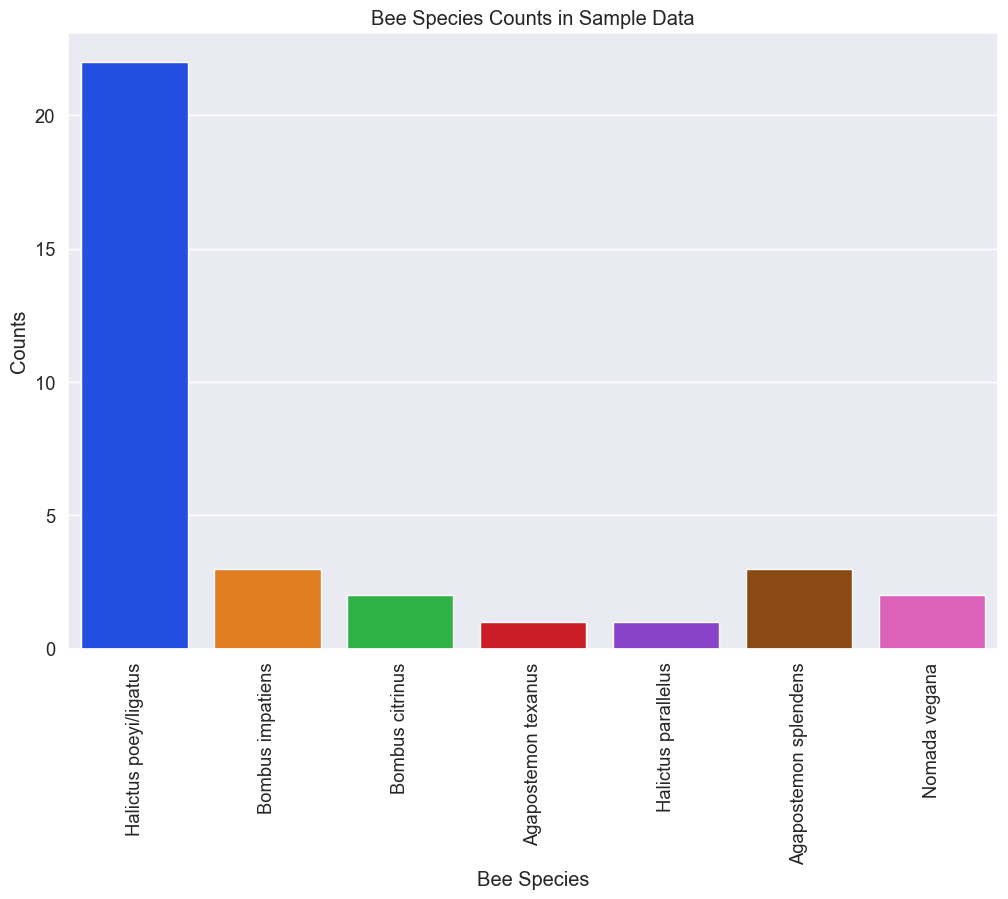

In [21]:
plt.figure(figsize=(12,8))
sns.set(font_scale=1.2)
sns.countplot(data=sample_data, x='bee_species', palette='bright')
plt.xticks(rotation=90)
plt.title('Bee Species Counts in Sample Data')
plt.xlabel('Bee Species')
plt.ylabel('Counts')
plt.show()

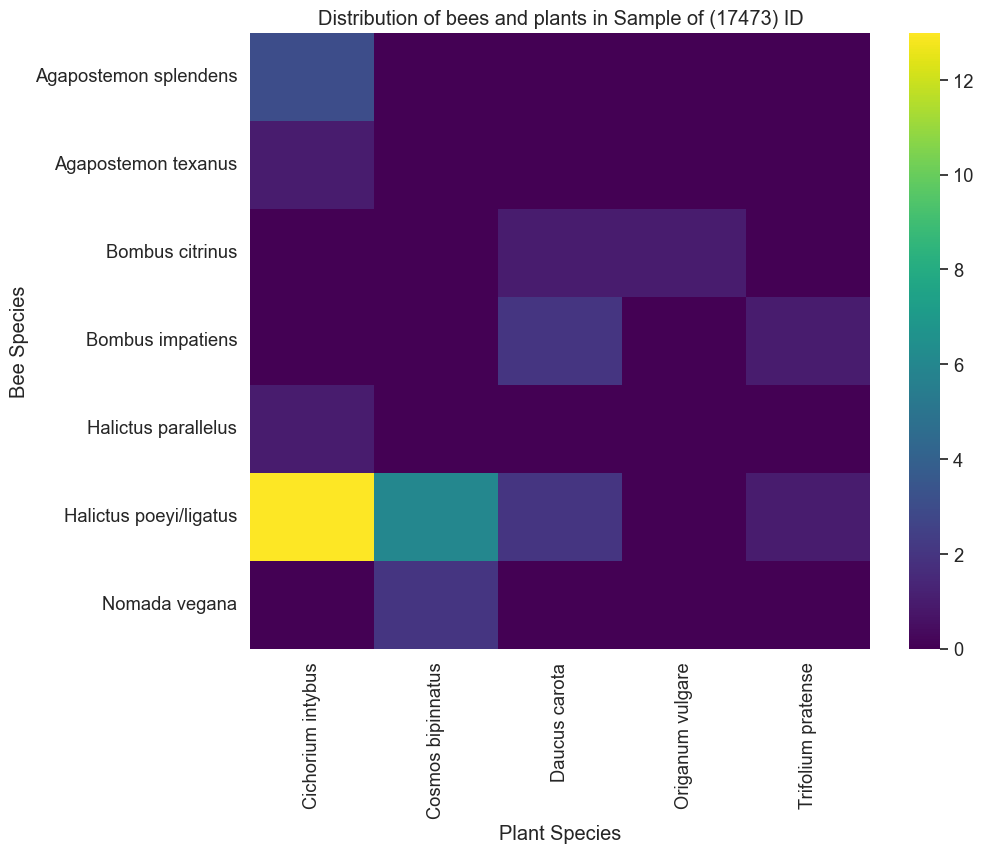

In [22]:
# Group the data by bee species, plant species, and sample ID, and count the number of interactions
counts = sample_data.groupby(['bee_species', 'plant_species']).size().reset_index(name='counts')

# Create a pivot table with bee species as rows, plant species as columns, 
# and the count of interactions as values
pivot_table = counts.pivot_table(values='counts', 
                                 index='bee_species', 
                                 columns='plant_species', 
                                 fill_value=0)

# Create a heatmap
plt.figure(figsize=(10, 8))  # Adjust size as needed
sns.heatmap(pivot_table, cmap='viridis')

# Set labels
plt.xlabel('Plant Species')
plt.ylabel('Bee Species')
plt.title('Distribution of bees and plants in Sample of (17473) ID')

plt.show()

Based on our Dataset which contains only **2** Native bees with specified plant specy, I would suggest **Daucus carota** and **Trifolium incarnatum** plants to the agency to support native bees.